# Computer lab 2 - Automatic control 2

$ \newcommand{\mexp}[1]{\mathrm{e}^{#1}} $
$ \newcommand{\transp}{ ^{\mathrm{T}} }$

## Preparations
### Exercise 1 - the spectral factorization theorem
Determine a filter
\begin{equation}
H(z) = \frac{b}{z+a}
\end{equation}
That generates a signal with spectral density
\begin{equation}
\phi(\omega) = \frac{0.75}{1.25 - cos\omega}
\end{equation}

Hint: Set up state space model and use the Lyaponov equation to find the variance.

\begin{align}
x(k+1) &= -a x(k) + bu(k)\\
y(k) &= x(k)
\end{align}

The covariance
\begin{equation}
P(k) = E\tilde{x}(k)\tilde{x}\transp(k) = E \big(x(k) - m(k)\big)\big(x^{\mathrm{T}}(k) - m^{\mathrm{T}}(k)\big)
\end{equation}
is governed by the difference equation
\begin{equation}
P(k+1) = \Phi P(k) \Phi^{\mathrm{T}} + b^2R_1 = a^2P(k) + b^2,
\end{equation}
with initial condition
\begin{equation}
P(0) = r_0.
\end{equation}
The solution is
\begin{align}
P(1) &= a^2r_0 + b^2\\
P(2) &= a^2P(1) + b^2 = a^4r_0 + a^2b^2 + b^2\\
P(3) &= a^2P(2) + b^2 = a^6r_0 + a^4b^2 + a^2b^2 + b^2 = a^6r_0 + (1 + a^2 + a^4)b^2\\
    & \vdots\\
P(k) &= a^{2k}r_0 + \big(1 + a^2 + \cdots + a^{2(k-1)} \big)b^2 = a^{2k}r_0 + \frac{1-a^{2k}}{1-a^2}b^2,
\end{align}
where we have made use of the properites of finite geomtric sums in the last equality.

For stable system ($|a| < 1$) we get
\begin{equation}
P(k) \to \frac{b^2}{1-a^2}
\end{equation}

The covariance function for $x$ is
\begin{equation}
r_x(k+\tau,k) = E\tilde{x}(k+\tau)\tilde{x}\transp(k) = a^\tau P(k),
\end{equation}
hence,
\begin{equation}
r_x(k+\tau,k) \to \frac{b^2a^{|\tau|}}{1-a^2}
\end{equation}
Hence, the variance is 
\begin{equation}
\mathrm{Var} x = r(0) = \frac{b^2}{1-a^2}.
\end{equation}

Identify the parameters $a$ and $b$:

Note that the spectal density is 
\begin{equation}
\phi(\omega) 2\pi = H(\mexp{i\omega})H(\mexp{-i\omega}) \phi_u(\omega) = \frac{b^2}{\big(\mexp{i\omega}+a\big)\big(\mexp{-i\omega}+a\big)} = \frac{b^2}{1 + a\mexp{i\omega}+a\mexp{-i\omega} + a^2} = \frac{b^2}{1+a^2+2acos\omega} = \frac{\frac{b^2}{-2a}}{\frac{1+a^2}{-2a} - cos\omega}.
\end{equation}
Setting coefficients equal in this expression and the given spectral density gives 
\begin{align}
\frac{b^2}{-2\pi2a} &= \frac{3}{4} \quad \Rightarrow \quad b^2 = -3a\pi\\
\frac{1+a^2}{-2a} &= \frac{5}{4} \quad \Rightarrow \quad a^2 + \frac{5}{2}a + 1 = 0 
\end{align}
so,
\begin{align}
a &= \begin{cases} -\frac{5}{4} + \frac{1}{2}\sqrt{\frac{25}{4}-4} = -\frac{1}{2} & \text{stable}\\
                   -\frac{5}{4} - \frac{1}{2}\sqrt{\frac{25}{4}-4} = -2 & \text{unstable}\\
                   \end{cases}\\
                   b &= \sqrt{\frac{3\pi}{2}}.
\end{align}
                     



In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import control.matlab as cm
import sympy as sy
from scipy import signal

/home/kjartan/.virtualenvs/jupyter_notebook/local/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kjartan/.virtualenvs/jupyter_notebook/local/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/kjartan/.virtualenvs/jupyter_notebook/local/lib/python2.7/site-packages/matplotlib/legend.py:319: UserWarning: Unrecognized location "Correct solution". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(six.iterkeys(self.codes))))


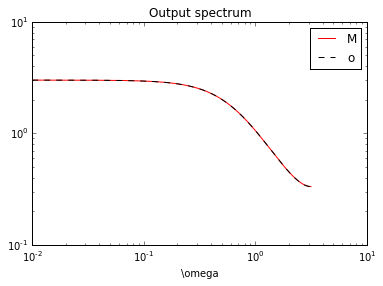

In [2]:
def d_spectrum(A, B, sigma2):
    lgw1 = -2
    w = np.logspace(lgw1,np.log10(np.pi), 300)
    (wp,Hp) = signal.freqz(B,A,w)
    wm = -w
    (wm,Hm) = signal.freqz(B,A,wm)
    return (w, sigma2*Hp*Hm/(2*np.pi))
def lab2a(a,b):
    A = [1, a]
    B = b
    # Compute spectrum
    (w_ab, fi_ab)=d_spectrum(A,B,1)
    # True spectrum
    fi_0 = 0.75 / (1.25-np.cos(w_ab))
    
    # Plot spectra
    plt.loglog(w_ab, fi_ab, 'r')
    plt.loglog(w_ab, fi_0, '--k')
    plt.title('Output spectrum')
    plt.xlabel('\omega')
    plt.legend('Model', 'Correct solution')
a = -0.5
b = np.sqrt(3*np.pi/2)

lab2a(a,b)

## Preparation exercise 3
Covariance function of MA(1) process
\begin{align}
x(k+1) &= \begin{bmatrix} 0 & 0 \\ c & 0 \end{bmatrix} x(k) + \begin{bmatrix}1\\1\end{bmatrix} \epsilon(k)\\
y(k) &= \begin{bmatrix} 0 & 1 \end{bmatrix} x(k) = x_2(k)
\end{align}
with $\epsilon(k)$ being a sequence of white noise with unit variance and zero mean.

The state covariance $r_x(k) = P(k) = \mathrm{E}x(k)x\transp(k)$ is governed by the equation
\begin{equation}
P(k+1) = \Phi P(k) \Phi\transp + R_1.
\end{equation}
In steady state we have $P(k+1) = P(k)=P$, so $P$ can be found by solving the Lyaponov equation 
\begin{equation}
P = \Phi P \Phi\transp + R_1,
\end{equation}
where, in the case here
\begin{equation}
R_1 = \begin{bmatrix}1\\1\end{bmatrix} \begin{bmatrix}1 & 1\end{bmatrix} = \begin{bmatrix} 1 & 1\\1 & 1\end{bmatrix}
\end{equation}

According to [wikipedia on the Lyaponov equation](https://en.wikipedia.org/wiki/Lyapunov_equation), the solution can be written as an infinite sum
\begin{equation}
P = \sum_{k=0}^{\infty} \Phi^k R_1 \big(A\transp\big)^k.
\end{equation}
Here we have
\begin{align}
\Phi &= \begin{bmatrix} 0 & 0 \\ c & 0 \end{bmatrix}\\
\Phi^2 &= \begin{bmatrix} 0 & 0 \\ c & 0 \end{bmatrix}\begin{bmatrix} 0 & 0 \\ c & 0 \end{bmatrix} = \begin{bmatrix} 0 & 0\\0 & 0\end{bmatrix}\\
\Phi^3 &= 0\\
&\vdots
\end{align}
This gives a very short series:
\begin{equation}
P = R_1 + \begin{bmatrix} 0 & 0 \\ c & 0 \end{bmatrix}R_1\begin{bmatrix} 0 & c \\ 0 & 0 \end{bmatrix} = R_1 + \begin{bmatrix} 0 & 0\\0 & c^2\end{bmatrix}
\end{equation}
See verification below



In [3]:
c = sy.symbols('c')
Phi = sy.Matrix([[0,0],[c,0]])
Phi2 = Phi*Phi
print Phi2
R1 = sy.Matrix([[1,1],[1,1]])
P = R1 + Phi*R1*Phi.T
P

Matrix([[0, 0], [0, 0]])


Matrix([
[1,        1],
[1, c**2 + 1]])

The variance of $y$ is the variance of $x_2$, so
\begin{equation}
\mathrm{var}\; y = 1 + c^2.
\end{equation}

To get the covariance function, note that 
\begin{equation}
r_x(k+\tau,k) = \mathrm{E} x(k+\tau)x\transp = \mathrm{E}\big(\Phi^\tau x(k) + \Gamma \epsilon(k+\tau) + \Phi B \epsilon(k+\tau-1) + \Phi^2B \epsilon(k+\tau-2) + \cdots + \Phi^\tau B \epsilon(k) \big)x\transp(k) = \Phi^\tau P(k),
\end{equation}
since $x(k)$ is independent of future noise terms. 
Since $\Phi^k = 0$ for $k>1$, we have

\begin{align}
r_x(0) &= P = \begin{bmatrix} 1 & 1\\1 & 1+c^2\end{bmatrix}\\
r_x(1) &= \Phi P = \begin{bmatrix} 0 & 0\\c & c \end{bmatrix}\\
r_x(\tau) &= 0, \; \tau>1
\end{align}


## Exercise 2
Simulate ARMA(1) process


In [15]:
a = np.arange(24)
print len(a[2:])
print len(a[:-2])
print np.cov(a[2:], a[:-2])

22
22
[[ 42.16666667  42.16666667]
 [ 42.16666667  42.16666667]]


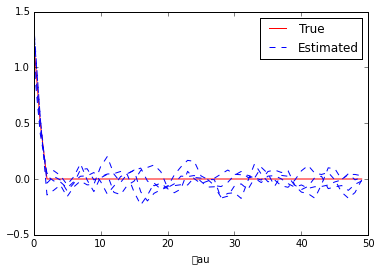

In [43]:
import pdb
def xcov(a,b,nlags):
    """ Cross correlation function for given number of lags. Works for 1-dimensional vectors a and b
        OBS: Unlike matlabs xcov function, this does not compute values for negative lags (assumes) symmetric
        function.
    """
    aa = a.ravel()
    bb = b.ravel()
    return np.array( [np.cov(aa,aa)] + [np.cov(aa[:-tau],bb[tau:]) for tau in range(1,nlags) ] )

def lab2b(C,A,N=100,tau_max=50, nr=1):
    lam = 1.0
    a = A[1]
    c = C[1]
    tau = np.arange(tau_max)
    e = np.random.normal(0,1,(N,nr))
    sys = (C, A, 1)
    r_e = []
    for i in range(nr):
        (t_out, yn) = signal.dlsim(sys, e[:,i])
        cv = xcov(yn,yn, tau_max)
        r_e.append(cv[:,1,0])
    r_e = np.array(r_e)
    NN = min(N,50)
    
    r_t = lam/(1-a**2) * np.hstack( (1+c**2-2*a*c, (c-a)*(1-a*c)*(-a)**(tau[1:]-1) ) )
    
    m = np.mean(r_e, axis=0)
    st = np.std(r_e, axis=0)
    
    #1/0
    plt.plot(tau, r_t, 'r-')
    plt.plot(tau, r_e.T, 'b--')
    plt.legend(['True', 'Estimated'])
    plt.xlabel('\tau')

#lab2b([1, 0], [1, -0.4], N=400, nr=4)
lab2b([1, 0.5], [1, 0], N=400, nr=4)

        

In [31]:
pdb.pm()

> <ipython-input-30-e7a3b6b244f2>(31)lab2b()
-> 1/0
(Pdb) r_e.shape
(1, 50)
(Pdb) cv.shape
(50, 2, 2)
(Pdb) cv[:4,:,:]
array([[[ 5.15203502,  5.15203502],
        [ 5.15203502,  5.15203502]],

       [[ 5.15240258,  4.6261038 ],
        [ 4.6261038 ,  5.15243297]],

       [[ 5.15229716,  4.15816722],
        [ 4.15816722,  5.15292142]],

       [[ 5.15215686,  3.71376601],
        [ 3.71376601,  5.15336661]]])
(Pdb) q


## Exercise 3
Pole-placement for observer

Discrete time system
\begin{align}
x(t+1) &= Fx(t) + Gu(t) + Nv_1(t)\\
y(t) &= Hx(t) + v_2(t),
\end{align}
with
\begin{align}
F &= \begin{bmatrix} 0.3 & -0.5\\ 1 & 0\end{bmatrix},\\
G &= \begin{bmatrix} 1\\0\end{bmatrix},\\
H &= \begin{bmatrix} 0 & 1\end{bmatrix}, \\
N &= \begin{bmatrix} 1\\ 1 \end{bmatrix}
\end{align}

Consider observer
\begin{equation}
 \hat{x}(t+1) = F\hat{x}(t) + Gu(t) + K\big(y - H\hat{x}(t)\big),
\end{equation}
with state estimation error $\tilde{x}(t) = x(t) - \hat(x)(t)$ governed by
\begin{equation}
 \tilde{x}(t+1) = \big(F-KH\big)\tilde{x}(t) + Nv_1(t) - Kv_2(t).
\end{equation}

Find observer gain $K$ so that the poles of the observer are placed in 
\begin{equation}
p = -0.4 \pm 0.3j
\end{equation}



In [46]:
F = np.array([[0.3, -0.5], [1, 0]])
G = np.array([[1],[0]])
H = np.array([[0, 1]])
N = np.array([[1],[1]])
K = cm.place(F.T, H.T, [-0.4+0.3*1j, -0.4-0.3*1j]).T
print K
np.linalg.eig(F-np.dot(K,H))

[[ 0.08]
 [ 1.1 ]]


(array([-0.4+0.3j, -0.4-0.3j]),
 array([[ 0.55689010+0.23866719j,  0.55689010-0.23866719j],
        [ 0.79555728+0.j        ,  0.79555728-0.j        ]]))

The covariance matrix of the state estimation error is given by the solution to the Lyaponov equation
\begin{equation}
P = APA\transp + NN\transp \sigma_1^2 + KK\transp \sigma_2^2,
\end{equation}
which can be written 
\begin{equation}
APA\transp - P + Q = 0
\end{equation}
where 
\begin{equation}
Q = NN\transp \sigma_1^2 + KK\transp \sigma_2^2
\end{equation}


In [48]:
sigma_1 = 1
sigma_2 = 0.5

Ao = F - np.dot(K,H)
Qo = np.dot(N,N.T)*sigma_1**2 + np.dot(K,K.T)*sigma_2**2
Xo = cm.dlyap(Ao, Qo)
print Xo

[[ 1.25764228  1.33617886]
 [ 1.33617886  1.80691057]]


Find oserver gain for a steady-state Kalman filter instead.

Note that in the Kalman filter we have the recursions
\begin{align}
\bar{P}_k &= FP_{k-1}F\transp + Q\\
P_k &= (1-K_kH)\bar{P}_k,
\end{align}
with Kalman gain
\begin{equation}
K_k = \bar{P}_kH\transp\big(H\bar{P}_kH\transp + R\big)^{-1}.
\end{equation}
Here $Q=NN\transp \sigma_1^2$ is the covariance matrix of the process noise.

In steady state we have $\bar{P}_{k+1}= \bar{P}_k = \bar{P}$, so the two recursions can be combined to yield the algebraic Riccatti equation

\begin{equation}
\bar{P} = F\bar{P}F\transp + Q - F\bar{P}H\transp\big(H\bar{P}H\transp + R\big)^{-1}H\bar{P}F\transp.
\end{equation}

The solution to this can then be used to solve for the steady state Kalman gain

Then compute Kalman gain as 
\begin{equation}
K = F \bar{P}H\transp\big(H\bar{P}H\transp + R\big)^{-1},  
\end{equation}
where $R=\sigma_2^2$ is the covariance matrix of the measurement noise.

Now the Kalman update on observer form is given by
\begin{equation}
\hat{x}(t+1) = F\hat{x}(t) + Gu(t) + K\big(y(t) - H\hat{x}(t)\big)
\end{equation}

In [68]:
A = F.T
B = H.T
(X,L,G) = cm.dare(F.T, H.T, sigma_1**2*np.dot(N,N.T), sigma_2**2)
K = np.dot(F,G.T)
Kk = np.dot(X, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(X, H.T)) + sigma_2**2) ))
Gtest = np.dot( np.linalg.inv( np.dot(B.T, np.dot(X, B) ) + sigma_2**2 ), np.dot(B.T, X) )
print Kk
print G
print Gtest
print np.dot(F,Kk)
print np.linalg.eig(F-np.dot(Kk, H))
print np.linalg.eig(A-np.dot(B,G))
print L

Ak = F - np.dot(G.T,H)
Qk = np.dot(N,N.T)*sigma_1**2 + np.dot(Kk,Kk.T)*sigma_2**2
Xk = cm.dlyap(Ak, Qk)
print Xk
print Xo
print X


[[ 0.63417447]
 [ 0.8469135 ]]
[[-0.23320441  0.63417447]]
[[ 0.63417447  0.8469135 ]]
[[-0.23320441]
 [ 0.63417447]]
(array([-0.27345675+0.89739725j, -0.27345675-0.89739725j]), array([[ 0.72899571+0.j       ,  0.72899571-0.j       ],
       [ 0.36859189-0.5768061j,  0.36859189+0.5768061j]]))
(array([-0.16708724+0.22051101j, -0.16708724-0.22051101j]), matrix([[ 0.88847810+0.j       ,  0.88847810-0.j       ],
        [-0.41499678+0.1959192j, -0.41499678-0.1959192j]]))
[-0.16708724+0.22051101j -0.16708724-0.22051101j]
[[ 1.11076086  1.16498821]
 [ 1.16498821  1.35903982]]
[[ 1.25764228  1.33617886]
 [ 1.33617886  1.80691057]]
[[ 1.03984474  1.03564729]
 [ 1.03564729  1.38306366]]


In [56]:
L

array([-0.16708724+0.22051101j, -0.16708724-0.22051101j])